# MILESTONE 1

`Ridhwan Muttaqien - HCK06`

`URL dashboard : `https://lookerstudio.google.com/reporting/ac24903c-9564-48f4-a458-ef8ed66d45e8` `

## Identifikasi Masalah

```
Dubizzle adalah salah satu e-commerce terbesar di Uni Emirat Arab. Barang yang dijual beragam mulai dari perlengkapan rumah tangga sampai mobil bekas. Di Milestone 1 ini kita akan menganalisa data mobil bekas yang dijual di Dubizzle dari tahun 2018 - 2022 untuk mengetahui preferensi kepemilikan mobil di kota Dubai tahun 2018 - 2022.

Beberapa pertanyaan yang akan dijawab terkait problem statement di atas adalah :

1. Kota mana yang memiliki jumlah mobil dijual terbanyak?

2. Jenis mobil apa saja yang terbanyak dijual di Dubai?

3. Merk mobil jenis SUV & Sedan apa yang terbanyak dijual di kota Dubai?

4. Berapa jumlah mobil yang dijual di Dubai per tahunnya?

5. Bagaimana distribusi data dari harga mobil SUV & Sedan yang dijual di Dubai?

6. Jika seseorang yang tinggal di Dubai ingin membeli mobil bekas di Dubizzle, berapa uang yang harus dimiliki orang tersebut untuk membeli mobil SUV & Sedan? (rentang harga mobil sehingga orang tersebut mendapatkan pilihan yang cukup banyak ketika ingin membeli mobil di Dubizzle)
```

## Importing Library

In [2]:
# import library yang akan digunakan

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Loading Data

`Sumber dataset : https://www.kaggle.com/datasets/alihassankp/dubizzle-used-car-sale-data`

In [3]:
# loading data hasil download dari url di atas

df = pd.read_csv('data.csv',parse_dates=['date_posted'],dayfirst=True)
df

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,2022-05-13
1,chevrolet silverado,"110,000",39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,2022-01-14
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,"78,000",200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,2022-05-05
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,"899,000",27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,2022-04-30
4,USED RENAULT DOKKER 2020,"33,000",69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,2022-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,AED7525month | 2015 Land Rover Range Rover Aut...,"215,000",105777,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,GCC Specs,500 - 600 HP,Gasoline,Left Hand Side,2015.0,White,Dubai,Autobiography,land-rover,range-rover,2021-11-18
9966,LOW MILEAGE Cadillac Escalade Platinum,"90,000",55640,Perfect inside and out,Perfect inside and out,Owner,SUV,8,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,White,Dubai,Platinum,cadillac,escalade,2022-05-11
9967,WARRANTY AVAILABLE || Range Rover Sport SVR Ca...,"679,000",100,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,Other,400 - 500 HP,Gasoline,Left Hand Side,NaN,Black,Dubai,SVR,land-rover,range-rover-sport,2021-12-14
9968,Chevrolet Malibu GCC Spec,"18,900",140000,"No accidents, very few faults",Perfect inside and out,Owner,Sedan,4,Automatic Transmission,GCC Specs,150 - 200 HP,Gasoline,Left Hand Side,2013.0,White,Dubai,LS,chevrolet,malibu,2022-03-06


`Terdapat 20 kolom pada dataset. Kita tidak akan memakai semua kolom, maka kolom yang tidak terpakai akan kita hapus pada langkah berikutnya` 

In [4]:
# overview data, melihat missing value di kolom apa saja, mengecek tipe data sudah sesuai atau belum

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   title                 9965 non-null   object        
 1   price_in_aed          9970 non-null   object        
 2   kilometers            9970 non-null   int64         
 3   body_condition        9970 non-null   object        
 4   mechanical_condition  9970 non-null   object        
 5   seller_type           9970 non-null   object        
 6   body_type             9970 non-null   object        
 7   no_of_cylinders       9911 non-null   object        
 8   transmission_type     9970 non-null   object        
 9   regional_specs        9970 non-null   object        
 10  horsepower            9970 non-null   object        
 11  fuel_type             9970 non-null   object        
 12  steering_side         9970 non-null   object        
 13  year              

```
- Kolom title, no_of_cylinders, motors_trim, dan year terdapat missing value. Handling missing value akan dilakukan pada langkah berikutnya
- Tipe data kolom price_in_aed masih berupa object maka akan diubah ke integer
```

## Cleaning Data

In [5]:
# menghapus kolom yang tidak terpakai

df1 = df.copy()
df1.drop({'body_condition','mechanical_condition','no_of_cylinders','regional_specs','steering_side','motors_trim','model'},axis=1,inplace=True)
df1

,title,price_in_aed,kilometers,seller_type,body_type,transmission_type,horsepower,fuel_type,year,color,emirate,company,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Dealer,SUV,Automatic Transmission,Unknown,Gasoline,2013.0,Silver,Dubai,mitsubishi,2022-05-13
1,chevrolet silverado,"110,000",39000,Dealer,SUV,Automatic Transmission,400 - 500 HP,Gasoline,2018.0,White,Sharjah,chevrolet,2022-01-14
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,"78,000",200000,Dealer,Sedan,Automatic Transmission,400 - 500 HP,Gasoline,2014.0,Blue,Sharjah,mercedes-benz,2022-05-05
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,"899,000",27000,Dealer,Hard Top Convertible,Automatic Transmission,600 - 700 HP,Gasoline,2018.0,Red,Dubai,ferrari,2022-04-30
4,USED RENAULT DOKKER 2020,"33,000",69000,Owner,Wagon,Manual Transmission,Less than 150 HP,Gasoline,2020.0,White,Dubai,renault,2022-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,AED7525month | 2015 Land Rover Range Rover Aut...,"215,000",105777,Dealer,SUV,Automatic Transmission,500 - 600 HP,Gasoline,2015.0,White,Dubai,land-rover,2021-11-18
9966,LOW MILEAGE Cadillac Escalade Platinum,"90,000",55640,Owner,SUV,Automatic Transmission,400 - 500 HP,Gasoline,2014.0,White,Dubai,cadillac,2022-05-11
9967,WARRANTY AVAILABLE || Range Rover Sport SVR Ca...,"679,000",100,Dealer,SUV,Automatic Transmission,400 - 500 HP,Gasoline,NaN,Black,Dubai,land-rover,2021-12-14
9968,Chevrolet Malibu GCC Spec,"18,900",140000,Owner,Sedan,Automatic Transmission,150 - 200 HP,Gasoline,2013.0,White,Dubai,chevrolet,2022-03-06


`Jumlah kolom sudah berkurang menjadi 13. Kita akan mengecek ulang apakah masih terdapat missing value?`

In [6]:
# overview data setelah kolom dibuang

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              9965 non-null   object        
 1   price_in_aed       9970 non-null   object        
 2   kilometers         9970 non-null   int64         
 3   seller_type        9970 non-null   object        
 4   body_type          9970 non-null   object        
 5   transmission_type  9970 non-null   object        
 6   horsepower         9970 non-null   object        
 7   fuel_type          9970 non-null   object        
 8   year               9000 non-null   float64       
 9   color              9970 non-null   object        
 10  emirate            9970 non-null   object        
 11  company            9970 non-null   object        
 12  date_posted        9970 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory u

`masih terdapat missing value di kolom title dan year`

In [7]:
# handling missing value dengan mengisi value 'Unknown'

df_clean = df1.copy()
df_clean.fillna(value='Unknown',inplace=True)
df_clean

,title,price_in_aed,kilometers,seller_type,body_type,transmission_type,horsepower,fuel_type,year,color,emirate,company,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Dealer,SUV,Automatic Transmission,Unknown,Gasoline,2013.0,Silver,Dubai,mitsubishi,2022-05-13
1,chevrolet silverado,"110,000",39000,Dealer,SUV,Automatic Transmission,400 - 500 HP,Gasoline,2018.0,White,Sharjah,chevrolet,2022-01-14
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,"78,000",200000,Dealer,Sedan,Automatic Transmission,400 - 500 HP,Gasoline,2014.0,Blue,Sharjah,mercedes-benz,2022-05-05
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,"899,000",27000,Dealer,Hard Top Convertible,Automatic Transmission,600 - 700 HP,Gasoline,2018.0,Red,Dubai,ferrari,2022-04-30
4,USED RENAULT DOKKER 2020,"33,000",69000,Owner,Wagon,Manual Transmission,Less than 150 HP,Gasoline,2020.0,White,Dubai,renault,2022-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,AED7525month | 2015 Land Rover Range Rover Aut...,"215,000",105777,Dealer,SUV,Automatic Transmission,500 - 600 HP,Gasoline,2015.0,White,Dubai,land-rover,2021-11-18
9966,LOW MILEAGE Cadillac Escalade Platinum,"90,000",55640,Owner,SUV,Automatic Transmission,400 - 500 HP,Gasoline,2014.0,White,Dubai,cadillac,2022-05-11
9967,WARRANTY AVAILABLE || Range Rover Sport SVR Ca...,"679,000",100,Dealer,SUV,Automatic Transmission,400 - 500 HP,Gasoline,Unknown,Black,Dubai,land-rover,2021-12-14
9968,Chevrolet Malibu GCC Spec,"18,900",140000,Owner,Sedan,Automatic Transmission,150 - 200 HP,Gasoline,2013.0,White,Dubai,chevrolet,2022-03-06


### mengubah type data kolom price_in_aed

In [8]:
a = df_clean['price_in_aed']

In [9]:
# menghilangkan tanda koma pada value kolom price_in_aed dengan menggunakan looping

b=[]
for i in range(len(a)):
    angka = a[i].replace(',','')
    b.append(angka)
    i=i+1
b

['26000',
 '110000',
 '78000',
 '899000',
 '33000',
 '98000',
 '257000',
 '82000',
 '149000',
 '35999',
 '389000',
 '750000',
 '329000',
 '63500',
 '19500',
 '270000',
 '155000',
 '83500',
 '75900',
 '39000',
 '30000',
 '135000',
 '89000',
 '499000',
 '119900',
 '63000',
 '75000',
 '160000',
 '114500',
 '245999',
 '1090000',
 '224000',
 '30000',
 '574000',
 '190000',
 '125000',
 '36000',
 '33000',
 '470000',
 '600000',
 '24500',
 '23000',
 '62000',
 '35500',
 '91000',
 '1149000',
 '34000',
 '59900',
 '159000',
 '89000',
 '980000',
 '58000',
 '459999',
 '205000',
 '135000',
 '41500',
 '90000',
 '65000',
 '1348000',
 '150000',
 '37000',
 '650000',
 '145000',
 '72000',
 '49000',
 '51900',
 '219000',
 '245000',
 '240000',
 '40000',
 '13500',
 '369000',
 '24500',
 '69500',
 '115500',
 '1299000',
 '109900',
 '400000',
 '225000',
 '288000',
 '77000',
 '129000',
 '379000',
 '50000',
 '59000',
 '149000',
 '1890000',
 '325000',
 '920000',
 '155000',
 '55000',
 '110000',
 '42000',
 '685000',
 '10

In [10]:
# mengubah value kolom price_in_aed dengan list hasil looping

df_clean['price_in_aed'] = b
df_clean

,title,price_in_aed,kilometers,seller_type,body_type,transmission_type,horsepower,fuel_type,year,color,emirate,company,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,26000,167390,Dealer,SUV,Automatic Transmission,Unknown,Gasoline,2013.0,Silver,Dubai,mitsubishi,2022-05-13
1,chevrolet silverado,110000,39000,Dealer,SUV,Automatic Transmission,400 - 500 HP,Gasoline,2018.0,White,Sharjah,chevrolet,2022-01-14
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,Dealer,Sedan,Automatic Transmission,400 - 500 HP,Gasoline,2014.0,Blue,Sharjah,mercedes-benz,2022-05-05
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000,27000,Dealer,Hard Top Convertible,Automatic Transmission,600 - 700 HP,Gasoline,2018.0,Red,Dubai,ferrari,2022-04-30
4,USED RENAULT DOKKER 2020,33000,69000,Owner,Wagon,Manual Transmission,Less than 150 HP,Gasoline,2020.0,White,Dubai,renault,2022-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,AED7525month | 2015 Land Rover Range Rover Aut...,215000,105777,Dealer,SUV,Automatic Transmission,500 - 600 HP,Gasoline,2015.0,White,Dubai,land-rover,2021-11-18
9966,LOW MILEAGE Cadillac Escalade Platinum,90000,55640,Owner,SUV,Automatic Transmission,400 - 500 HP,Gasoline,2014.0,White,Dubai,cadillac,2022-05-11
9967,WARRANTY AVAILABLE || Range Rover Sport SVR Ca...,679000,100,Dealer,SUV,Automatic Transmission,400 - 500 HP,Gasoline,Unknown,Black,Dubai,land-rover,2021-12-14
9968,Chevrolet Malibu GCC Spec,18900,140000,Owner,Sedan,Automatic Transmission,150 - 200 HP,Gasoline,2013.0,White,Dubai,chevrolet,2022-03-06


In [11]:
# mengubah format kolom ke integer

df_clean['price_in_aed'] = pd.to_numeric(df_clean['price_in_aed'])

### menghilangkan spasi pada kolom emirate

In [12]:
# mengecek value apa saja yang berada di kolom emirate

df_clean['emirate'].unique()

array([' Dubai', ' Sharjah', ' Abu Dhabi', ' Ajman', 'Ajman',
       ' Ras Al Khaimah', ' Umm Al Qawain', ' Al Ain', 'Abu Dhabi',
       'Sharjah', 'Dubai', 'Al Ain', ' Fujeirah', 'Fujeirah',
       'Umm Al Qawain', 'Ras Al Khaimah'], dtype=object)

`terlihat kolom emirate berisi nama kota yang disebut berulang meskipun namanya sama, karena terdapat spasi pada nama kota yang satunya`

In [13]:
# menghilangkan spasi pada nama kota

df_clean['emirate'] = df_clean['emirate'].str.strip()

In [14]:
# mengecek hasil penghapusan spasi pada nama kota

df_clean['emirate'].unique()

array(['Dubai', 'Sharjah', 'Abu Dhabi', 'Ajman', 'Ras Al Khaimah',
       'Umm Al Qawain', 'Al Ain', 'Fujeirah'], dtype=object)

`terlihat kota dengan nama yang diawali dengan spasi sudah hilang`

### mengisi kolom year dengan value baru

In [15]:
# mengisi kolom year dengan ekstraksi tahun dari date_posted

df_clean['year'] = df_clean['date_posted'].dt.year
df_clean

,title,price_in_aed,kilometers,seller_type,body_type,transmission_type,horsepower,fuel_type,year,color,emirate,company,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,26000,167390,Dealer,SUV,Automatic Transmission,Unknown,Gasoline,2022,Silver,Dubai,mitsubishi,2022-05-13
1,chevrolet silverado,110000,39000,Dealer,SUV,Automatic Transmission,400 - 500 HP,Gasoline,2022,White,Sharjah,chevrolet,2022-01-14
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,Dealer,Sedan,Automatic Transmission,400 - 500 HP,Gasoline,2022,Blue,Sharjah,mercedes-benz,2022-05-05
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000,27000,Dealer,Hard Top Convertible,Automatic Transmission,600 - 700 HP,Gasoline,2022,Red,Dubai,ferrari,2022-04-30
4,USED RENAULT DOKKER 2020,33000,69000,Owner,Wagon,Manual Transmission,Less than 150 HP,Gasoline,2022,White,Dubai,renault,2022-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,AED7525month | 2015 Land Rover Range Rover Aut...,215000,105777,Dealer,SUV,Automatic Transmission,500 - 600 HP,Gasoline,2021,White,Dubai,land-rover,2021-11-18
9966,LOW MILEAGE Cadillac Escalade Platinum,90000,55640,Owner,SUV,Automatic Transmission,400 - 500 HP,Gasoline,2022,White,Dubai,cadillac,2022-05-11
9967,WARRANTY AVAILABLE || Range Rover Sport SVR Ca...,679000,100,Dealer,SUV,Automatic Transmission,400 - 500 HP,Gasoline,2021,Black,Dubai,land-rover,2021-12-14
9968,Chevrolet Malibu GCC Spec,18900,140000,Owner,Sedan,Automatic Transmission,150 - 200 HP,Gasoline,2022,White,Dubai,chevrolet,2022-03-06


`Sebelumnya kolom year banyak berisi missing value, maka kita putuskan untuk mengganti value pada kolom year dengan value berisi tahun terjadinya penjualan untuk memudahkan pengolahan data di langkah selanjutnya`

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              9970 non-null   object        
 1   price_in_aed       9970 non-null   int64         
 2   kilometers         9970 non-null   int64         
 3   seller_type        9970 non-null   object        
 4   body_type          9970 non-null   object        
 5   transmission_type  9970 non-null   object        
 6   horsepower         9970 non-null   object        
 7   fuel_type          9970 non-null   object        
 8   year               9970 non-null   int64         
 9   color              9970 non-null   object        
 10  emirate            9970 non-null   object        
 11  company            9970 non-null   object        
 12  date_posted        9970 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 1012.7+

`missing value sudah bersih, tipe data sudah disesuaikan`

## Analisis & Perhitungan

In [17]:
df_clean

,title,price_in_aed,kilometers,seller_type,body_type,transmission_type,horsepower,fuel_type,year,color,emirate,company,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,26000,167390,Dealer,SUV,Automatic Transmission,Unknown,Gasoline,2022,Silver,Dubai,mitsubishi,2022-05-13
1,chevrolet silverado,110000,39000,Dealer,SUV,Automatic Transmission,400 - 500 HP,Gasoline,2022,White,Sharjah,chevrolet,2022-01-14
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,Dealer,Sedan,Automatic Transmission,400 - 500 HP,Gasoline,2022,Blue,Sharjah,mercedes-benz,2022-05-05
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000,27000,Dealer,Hard Top Convertible,Automatic Transmission,600 - 700 HP,Gasoline,2022,Red,Dubai,ferrari,2022-04-30
4,USED RENAULT DOKKER 2020,33000,69000,Owner,Wagon,Manual Transmission,Less than 150 HP,Gasoline,2022,White,Dubai,renault,2022-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,AED7525month | 2015 Land Rover Range Rover Aut...,215000,105777,Dealer,SUV,Automatic Transmission,500 - 600 HP,Gasoline,2021,White,Dubai,land-rover,2021-11-18
9966,LOW MILEAGE Cadillac Escalade Platinum,90000,55640,Owner,SUV,Automatic Transmission,400 - 500 HP,Gasoline,2022,White,Dubai,cadillac,2022-05-11
9967,WARRANTY AVAILABLE || Range Rover Sport SVR Ca...,679000,100,Dealer,SUV,Automatic Transmission,400 - 500 HP,Gasoline,2021,Black,Dubai,land-rover,2021-12-14
9968,Chevrolet Malibu GCC Spec,18900,140000,Owner,Sedan,Automatic Transmission,150 - 200 HP,Gasoline,2022,White,Dubai,chevrolet,2022-03-06


### 1. Kota mana yang memiliki jumlah penjualan terbanyak?

In [18]:
# menampilkan kota apa saja dalam kolom emirate dan menghitung frekuensi kemunculannya sebagai jumlah penjualan

df_clean['emirate'].value_counts()

Dubai             7999
Sharjah            987
Abu Dhabi          763
Ajman              146
Al Ain              41
Ras Al Khaimah      20
Umm Al Qawain        7
Fujeirah             7
Name: emirate, dtype: int64

In [19]:
# membuat list berisi 4 kota teratas berdasarkan jumlah penjualan

top4 = df_clean['emirate'].value_counts().head(4).index.tolist()
top4

['Dubai', 'Sharjah', 'Abu Dhabi', 'Ajman']

In [20]:
# membuat list dengan looping yang berisi sisa kota di luar top 4 dan memberi label others

kolom_baru = []
for i in df_clean['emirate']:
  if i in top4:
    kolom_baru.append(i)
  else:
    kolom_baru.append('Others')

df_clean['labels'] = kolom_baru

<Axes: ylabel='labels'>

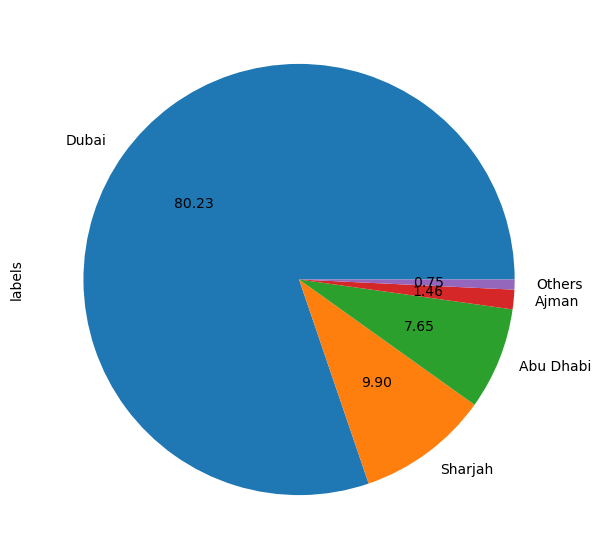

In [21]:
# membuat pie chart yang menunjukkan persentase jumlah penjualan per kota

df_clean['labels'].value_counts().head().plot(kind='pie', figsize=(7,7), autopct='%.2f')

`Dubai menjadi kota dengan jumlah penjualan mobil bekas terbanyak di situs Dubizzle. Persentasenya sangat jauh dibandingkan kota lain. Dubai sebagai kota terpadat di UEA mungkin menjadi salah satu faktor tingginya penjualan mobil`

In [23]:
df_clean.to_csv('milestone1_rdwn.csv',index=False)

### 2. Jenis mobil apa saja yang memiliki jumlah penjualan terbanyak di kota Dubai?

In [23]:
# menampilkan jumlah penjualan mobil di kota Dubai berdasarkan tipenya

sales_type = df_clean[df_clean['emirate']=='Dubai'].groupby('body_type').count()['title'].sort_values(ascending=True)
sales_type

body_type
Utility Truck             16
Other                     53
Wagon                     55
Crossover                 96
Van                      130
Soft Top Convertible     132
Hard Top Convertible     151
Sports Car               206
Hatchback                287
Pick Up Truck            343
Coupe                    739
Sedan                   2108
SUV                     3683
Name: title, dtype: int64

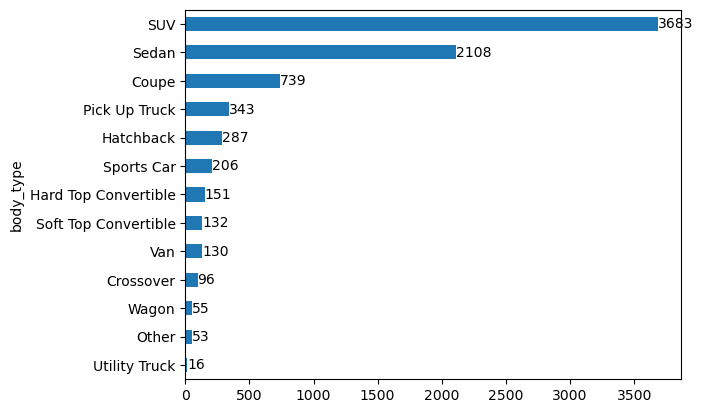

In [24]:
# menampilkan bar diagram penjualan mobil di dubai berdasarkan tipenya

sales_type = df_clean[df_clean['emirate']=='Dubai'].groupby('body_type').count()['title'].sort_values(ascending=True)
g = sales_type.plot(kind='barh')
for i in g.containers:
  plt.bar_label(i)

`Jika kita bandingkan dengan hasil penjabaran di nomor 1 maka tipe SUV dan Sedan adalah mayoritas tipe mobil yang dijual di Dubai (5791 dari 7999)`

### 3. Merk mobil jenis SUV & Sedan apa yang memiliki jumlah penjualan terbanyak di kota Dubai?

In [45]:
# menampilkan jumlah penjualan mobil SUV & Sedan di kota Dubai berdasarkan merk dagang

df_clean[(df_clean['emirate']=='Dubai') & ((df_clean['body_type']=='SUV')|(df_clean['body_type']=='Sedan'))].groupby('company').count()['title'].sort_values(ascending=True)

company
haval                 1
fiat                  1
levc                  1
buick                 1
saab                  1
acura                 2
genesis               2
polestar              2
ferrari               2
skoda                 2
ssang-yong            2
citroen               3
mg                    3
opel                  3
gac                   3
changan               3
mercedes-maybach      4
aston-martin          4
geely                 4
jetour                4
mini                  6
hummer                6
subaru                7
chrysler              7
alfa-romeo           11
peugeot              12
suzuki               15
volvo                19
tesla                22
maybach              27
renault              39
lincoln              44
lamborghini          53
mazda                60
gmc                  62
jaguar               65
kia                  68
bentley              71
maserati             72
cadillac            102
honda               103
chevrole

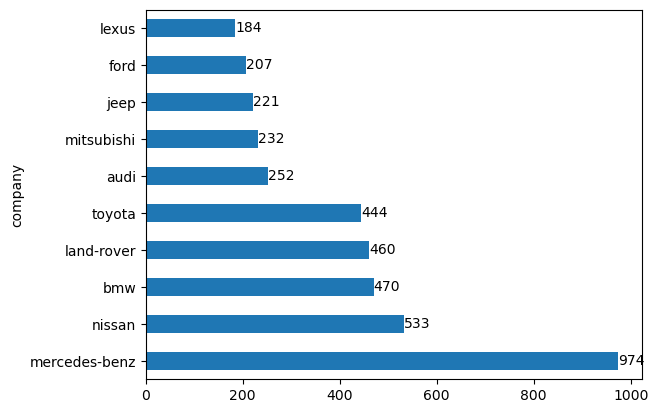

In [44]:
# visualisasi dari jumlah penjualan mobil SUV & Sedan di kota Dubai berdasarkan merk dagang

sales_merk = df_clean[(df_clean['emirate']=='Dubai') & ((df_clean['body_type']=='SUV')|(df_clean['body_type']=='Sedan'))].groupby('company').count()['title'].sort_values(ascending=False).head(10)
h = sales_merk.plot(kind='barh')
for i in h.containers:
  plt.bar_label(i)

`Mercedes-Benz menjadi produsen mobil SUV & Sedan yang paling banyak dijual di Dubai`

### 4. Berapa jumlah mobil yang dijual di Dubai per tahunnya?

In [29]:
# menghitung jumlah mobil yang dijual di Dubai tiap tahunnya

df_clean[df_clean['emirate']=='Dubai'].groupby('year')['title'].count()

year
2018       1
2019       2
2020      16
2021     608
2022    7372
Name: title, dtype: int64

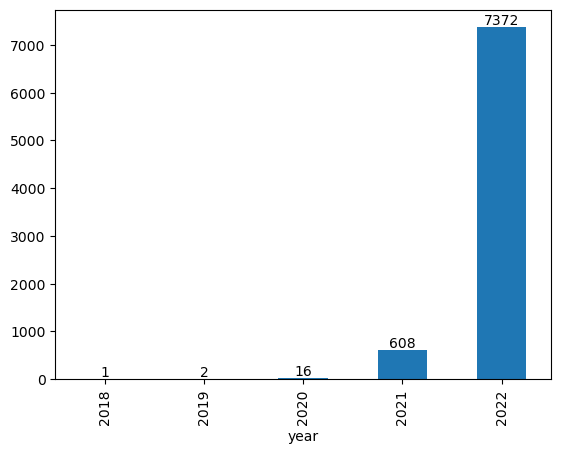

In [49]:
# visualisasi data di atas menggunakan bar diagram

sales_year = df_clean[df_clean['emirate']=='Dubai'].groupby('year')['title'].count()
j = sales_year.plot(kind='bar')
for i in j.containers:
  plt.bar_label(i)

`Jumlah mobil yang dijual meningkat tajam di tahun 2022 jika dibandingkan tahun-tahun sebelumnya. Kita perlu memeriksa kondisi ekonomi di kurun waktu tersebut sebagai background untuk memahami kenaikan yang sangat tajam tersebut`

### 5. Bagaimana distribusi data dari harga mobil SUV & Sedan yang dijual di Dubai?

In [32]:
# menampilkan data mobil SUV & Sedan di Dubai

df5 = df_clean[((df_clean['body_type']=='SUV')|(df_clean['body_type']=='Sedan'))&(df_clean['emirate']=='Dubai')]
df5

,title,price_in_aed,kilometers,seller_type,body_type,transmission_type,horsepower,fuel_type,year,color,emirate,company,date_posted,labels
0,MITSUBISHI PAJERO 3.5L / 2013,26000,167390,Dealer,SUV,Automatic Transmission,Unknown,Gasoline,2022,Silver,Dubai,mitsubishi,2022-05-13,Dubai
5,A7 S-line Quattro. Under Warranty. Accidents F...,98000,84000,Owner,Sedan,Automatic Transmission,200 - 300 HP,Gasoline,2022,Gold,Dubai,audi,2022-04-30,Dubai
6,"AED 4,999 /MONTH| JEEP GRAND CHEROKEE SRT V8 6...",257000,68000,Dealer,SUV,Automatic Transmission,Unknown,Gasoline,2022,Black,Dubai,jeep,2022-03-20,Dubai
11,"2020 Mercedes G63 | 96,000 KM | GCC Spec | Ava...",750000,96000,Dealer,SUV,Automatic Transmission,500 - 600 HP,Gasoline,2022,Silver,Dubai,mercedes-benz,2022-04-12,Dubai
13,MITSUBISHI ATTRAGE SIGNATURE EDITION MODEL 202...,63500,0,Dealer,Sedan,Automatic Transmission,Less than 150 HP,Gasoline,2022,Blue,Dubai,mitsubishi,2022-04-09,Dubai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,Jeep Grand Cherokee L - Limited 3 years Warran...,225000,0,Dealer,SUV,Automatic Transmission,200 - 300 HP,Gasoline,2022,White,Dubai,jeep,2022-02-01,Dubai
9965,AED7525month | 2015 Land Rover Range Rover Aut...,215000,105777,Dealer,SUV,Automatic Transmission,500 - 600 HP,Gasoline,2021,White,Dubai,land-rover,2021-11-18,Dubai
9966,LOW MILEAGE Cadillac Escalade Platinum,90000,55640,Owner,SUV,Automatic Transmission,400 - 500 HP,Gasoline,2022,White,Dubai,cadillac,2022-05-11,Dubai
9967,WARRANTY AVAILABLE || Range Rover Sport SVR Ca...,679000,100,Dealer,SUV,Automatic Transmission,400 - 500 HP,Gasoline,2021,Black,Dubai,land-rover,2021-12-14,Dubai


In [33]:
# mencari rata-rata harga mobil dari kondisi di atas

df5['price_in_aed'].mean()

255094.21101709548

In [34]:
# mencari nilai tengah harga mobil

df5['price_in_aed'].median()

107000.0

In [35]:
# mengecek nilai skewness dari data harga mobil yang dijual

df5['price_in_aed'].skew()

3.456848325640149

```
Rata-rata harga mobil bekas yang dijual lebih tinggi dari nilai tengah harga mobil. Ini salah satu indikasi data harga memiliki distribusi right skewed. Kita juga mengecek nilai skewness dan ternyata memiliki nilai skewness di atas 1 maka bisa dipastikan data harga bertipe right skewed.

Ini berarti di dalam data harga yang kita miliki terdapat harga mobil yang berbeda jauh dengan harga kebanyakan mobil yang dijual. Walaupun kita sudah memakai data SUV & Sedan yang merupakan tipe yang paling banyak dijual tidak serta merta harganya menjadi relatif sama atau mendekati rata-rata.

Hal itu bisa disebabkan oleh perbedaan merk mobilnya. Ada merk-merk tertentu yang memang meiliki nilai jual tinggi karena memang itu pangsa pasar yang mereka pilih.
```

### 6. Jika seseorang yang tinggal di Dubai ingin membeli mobil bekas di Dubizzle, berapa uang yang harus dimiliki orang tersebut untuk membeli mobil SUV & Sedan? (rentang harga mobil sehingga orang tersebut mendapatkan pilihan yang cukup banyak ketika ingin membeli mobil di Dubizzle)

In [36]:
# menghitung confidence interval dari harga SUV & Sedan di Dubai

df6 = np.random.normal(df5['price_in_aed'].mean(), df5['price_in_aed'].std(), 10000)
ci = stats.norm.interval(0.95, df5['price_in_aed'].mean(), df5['price_in_aed'].std())
ci

(-555800.0498604879, 1065988.471894679)

`Jika seseorang di Dubai ingin membeli mobil SUV & Sedan maka disarankan dia memiliki budget maksimal 1.065.988 dinar UEA agar dia memiliki pilihan yang cukup banyak`

## Kesimpulan

```
Uni Emirat Arab adalah negara yang bisa kita golongkan sebagai negara kaya. Pendapatan per kapitanya menduduki posisi ke-7 tertinggi di dunia. Kondisi tersebut tidak lantas membuat masyarakatnya memiliki daya beli yang sama. Sehingga sangat mungkin masyarakat menggunakan barang bekas pakai dalam kehidupan sehari-hari. Termasuk dalam bidang kendaraan yaitu mobil.Dubizzle sebagai salah satu e-commerce terbesar di Uni Emirat Arab melihat peluang itu dan menawarkan dirinya menjadi platform untuk bertransaksi jual beli mobil bekas.

Dubizzle mencatat dari tahun 2018 hingga 2022 terjadi peningkatan yang tinggi pada jumlah mobil bekas yang dijual di platformnya. Tren peningkatan sangat terlihat mulai tahun 2021 dan meningkat sangat tajam di tahun berikutnya. Hal ini mungkin disebabkan oleh pandemi covid-19 dimana pendapatan masyarakat jelas sangat terdampak. Sehingga di tahun 2021 masyarakat mulai banyak yang menjual mobilnya melalui dubizzle.

Terdapat 7 kota di Uni Emirat Arab dan yang terbesar adalah Dubai jika mengacu pada tingkat kepadatan. Salah satu sumber pendapatan di kota Dubai adalah pariwisata yang sangat terdampak dengan terjadinya pandemi di tahun 2019. Kondisi ini membuat jumlah masyarakat Dubai yang ingin menjual mobilnya setahun setelah terjadinya pandemi menjadi tinggi. Bahkan yang tertinggi jika dibandingkan kota-kota lain di Uni Emirat Arab.

Mobil-mobil yang dijual masyarakat Dubai melalui Dubizzle didominasi oleh jenis SUV dan sedan. Jumlah postingan penjualan mobil di Dubizzle untuk kedua jenis mobil tersebut bahkan lebih besar dibandingkan sisa postingan penjualan mobil dengan jenis yang lain. Walaupun mobil bekas, ternyata harganya cukup tinggi yaitu berkisar di antara 107.000 - 255.000 dinar UEA. Selain karena jenis mobilnya, merk produsen mobil juga mempengaruhi harga jual mobil bekas di Dubai. Nama-nama seperti Mercedes-Benz, BMW, Audi jamak ditemukan di posting penjualan. Jenis dan merk mobil yang dijual membuat masyarakat harus menyiapkan uang yang cukup banyak untuk bisa mendapatkan pilihan yang beragam ketika mencari mobil bekas idamannya di situs Dubizzle.
```
